# Notebook V - Terrain Constraints

<hr>
This module calculates the yield reduction due to terrain slope, soil erosion, and Fournier Index (FI). Note that, terrain reduction factors are listed in ALL_REDUCTION_FACTOR_RAIN and ALL_REDUCTION_FACTOR_IRR python scripts.

Prepared by Geoinformatics Center, AIT
<hr>

### Google drive connection
In this step, we will connect to Google Drive service and mount the drive where we will start our PyAEZ project

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

Then, installing any additional python packages that required to run PyAEZ.
If working on your own PC/machine, these additional installation will vary depending on what is already installed in your Python library. 

In [ ]:
# 'Installing neccessary packages'
# !pip install gdal
# # !pip install pyaez==2.1.0

## Importing Libraries

In [1]:
'''import supporting libraries'''
# import pyaez
import matplotlib.pyplot as plt
import numpy as np
import os
try:
    from osgeo import gdal
except:
    import gdal
import sys

Setting the working directory -- where our PyAEZ project is located.

In [2]:
'Set the working directory'
work_dir = r'D:\PyAEZv2.1_Draft'  # Please change this to your working directory
os.chdir(work_dir)
sys.path.append('./pyaez/')
os.getcwd()


'pwd' is not recognized as an internal or external command,
operable program or batch file.


Check and create data output folder

In [ ]:
import os
folder_path = './data_output/NB5/'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print("Folder created successfully.")
else:
    print("Folder already exists.")


Folder created successfully.


## Applying Terrain Constraints

In [3]:
'''importing library'''

from pyaez import TerrainConstraints
terrain_constraints = TerrainConstraints.TerrainConstraints()

from pyaez import UtilitiesCalc
obj_utilities = UtilitiesCalc.UtilitiesCalc()

In [5]:
'''reading climate and slope data'''

precipitation = np.load('./data_input/climate/precipitation.npy') # mm / day

slope_map = gdal.Open('./data_input/LAO_Slope.tif').ReadAsArray() # Percentage Slope

In [6]:
'''passing climate and slope data'''

terrain_constraints.setClimateTerrainData(precipitation, slope_map)

Text(0.5, 1.0, 'Fournier Index')

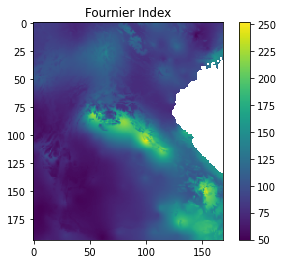

In [7]:
'''calculation of Fournier index'''

terrain_constraints.calculateFI()

# extraction of Fournier index (FI) if required
fi = terrain_constraints.getFI()

plt.imshow(fi)
plt.colorbar()
plt.title('Fournier Index')


In [8]:
'''reading yield data'''

yield_map_rain = gdal.Open('./data_output/NB4/soil_clim_adj_yield_maiz_rain.tif').ReadAsArray()
yield_map_irr = gdal.Open('./data_output/NB4/soil_clim_adj_yield_maiz_irr.tif').ReadAsArray()

In [10]:
'''applying terrain constraints'''

yield_map_rain_m5 = terrain_constraints.applyTerrainConstraints(yield_map_rain, 'R') # I: Irrigated, R: Rain-fed
yield_map_irr_m5 = terrain_constraints.applyTerrainConstraints(yield_map_irr, 'I') # I: Irrigated, R: Rain-fed

## get classified output
yield_map_rain_class_m5 = obj_utilities.classifyFinalYield(yield_map_rain_m5)
yield_map_irr_class_m5 = obj_utilities.classifyFinalYield(yield_map_irr_m5)

Text(0.5, 1.0, 'Terrain Constrainted Rainfed Yield Maize')

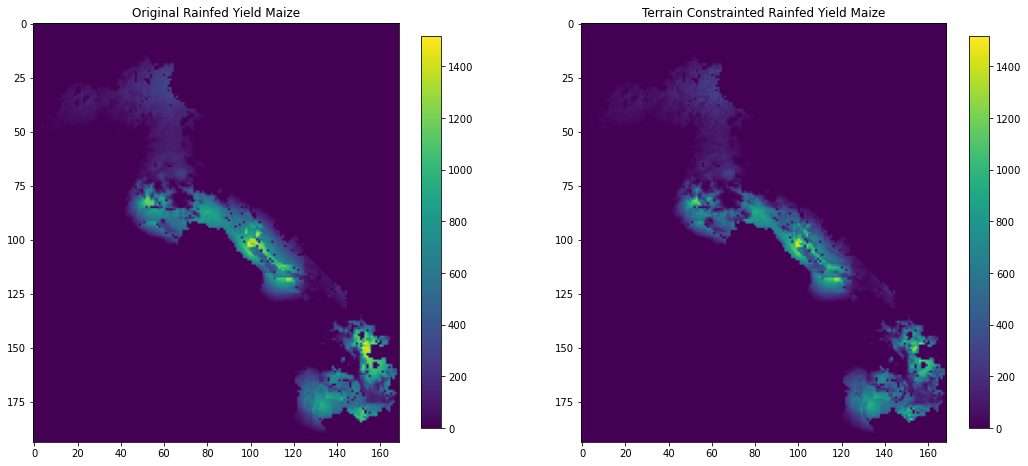

In [11]:
'''visualize result'''

plt.figure(1, figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(yield_map_rain, vmax = np.max([yield_map_rain_m5, yield_map_rain]))
plt.colorbar(shrink=0.8)
plt.title('Original Rainfed Yield Maize')

plt.subplot(1,2,2)
plt.imshow(yield_map_rain_m5, vmax = np.max([yield_map_rain_m5, yield_map_rain]))
plt.colorbar(shrink=0.8)
plt.title('Terrain Constrainted Rainfed Yield Maize')

Text(0.5, 1.0, 'Terrain Constrainted Irrigated Yield Maize')

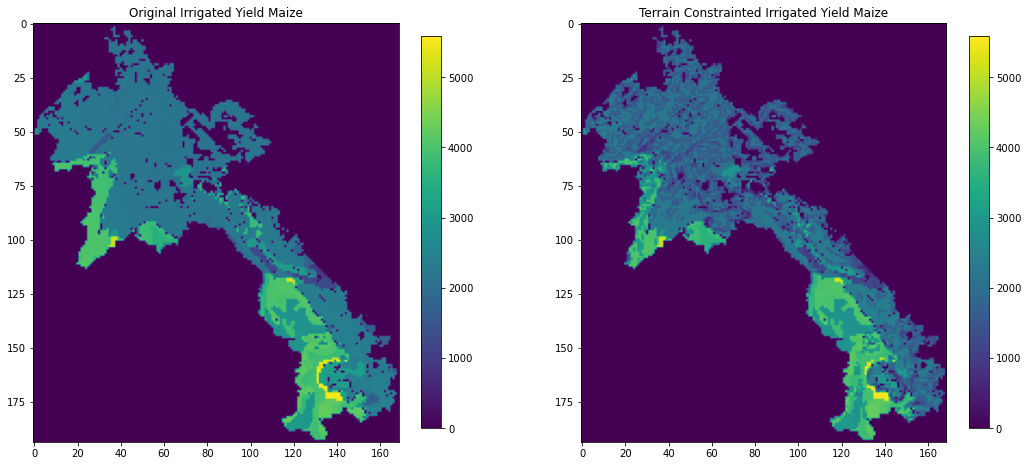

In [12]:
'''visualize result'''

plt.figure(1, figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(yield_map_irr, vmax = np.max([yield_map_irr_m5, yield_map_irr]))
plt.colorbar(shrink=0.8)
plt.title('Original Irrigated Yield Maize')

plt.subplot(1,2,2)
plt.imshow(yield_map_irr_m5, vmax = np.max([yield_map_irr_m5, yield_map_irr]))
plt.colorbar(shrink=0.8)
plt.title('Terrain Constrainted Irrigated Yield Maize')

In [13]:
'''save result'''

obj_utilities.saveRaster(r'./data_input/LAO_Admin.tif', r'./data_output/NB5/terr_soil_clim_adj_yield_maiz_rain.tif', yield_map_rain_m5)
obj_utilities.saveRaster(r'./data_input/LAO_Admin.tif', r'./data_output/NB5/terr_soil_clim_adj_yield_maiz_irr.tif', yield_map_irr_m5)

obj_utilities.saveRaster(r'./data_input/LAO_Admin.tif', r'./data_output/NB5/terr_soil_clim_adj_yield_maiz_rain_class.tif',yield_map_rain_class_m5)
obj_utilities.saveRaster(r'./data_input/LAO_Admin.tif', r'./data_output/NB5/terr_soil_clim_adj_yield_maiz_irr_class.tif',yield_map_irr_class_m5)

obj_utilities.saveRaster(r'./data_input/LAO_Admin.tif', r'./data_output/NB5/fournier_index.tif',fi)

<hr>

### END OF MODULE 5: TERRAIN CONSTRAINTS

<hr>